In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

CAD Extra Credit Homework by Sasha Bakker

__Initialize Coordinates__

In [2]:
x, y, z = np.mgrid[-2:2:101j, -2:2:101j, -2:2:101j]
l, m, n = np.shape(x)

__Sphere__

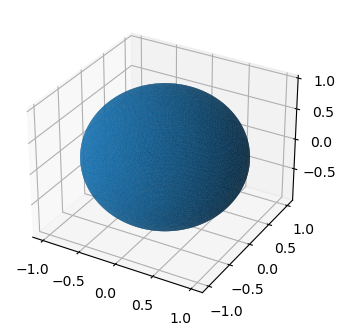

In [3]:
sphere = np.sqrt(x ** 2 + y ** 2 + z ** 2) - 1

verts, faces, normals, values = measure.marching_cubes(sphere, 0, spacing=(0.04, 0.04, 0.04))

verts[:,0]=verts[:,0]-np.mean(verts[:,0]) # translate the coordinates of mesh vertices and move to center x
verts[:,1]=verts[:,1]-np.mean(verts[:,1]) # translate the coordinates of mesh vertices and move to center y
verts[:,2]=verts[:,2]-np.mean(verts[:,2]) # translate the coordinates of mesh vertices and move to center z

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2]) 
plt.show()

Check the radius of the sphere:

In [4]:
print(max(verts[:,0]))
print(min(verts[:,0]))

1.0004764334766438
-0.9995235665233562


The sphere is centered at (0,0) with radius $r=1$. This means the domain of the sphere in $x$ should be (-1,1). We see that this is true because the min and max values in $x$ are $\min (x)=-1$ and $\max (x)=1$, within the uncertainty due to the mesh discretization of $\pm 0.04$. 

__Cylinder__

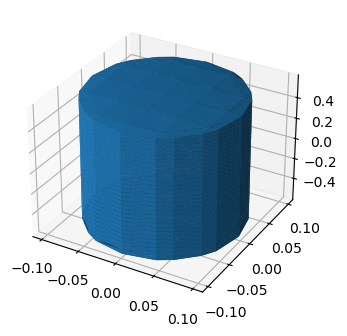

In [5]:
cylinder = x**2 + y**2 - 0.1**2
plane1 = z - 0.7
plane2 = z + 1/2 

# Cylinder with lids
sqrcil = np.zeros((l,m,n))

for i in range(l):
    for j in range(m):
        for k in range(n):
            sqrcil[i,j,k] = np.max( np.array( [cylinder[i,j,k], plane1[i,j,k] ]  ) ) # INTERSECTION
            sqrcil[i,j,k] = np.max( np.array( [sqrcil[i,j,k], -plane2[i,j,k] ]  ) ) # SUBTRATION 1

verts, faces, normals, values = measure.marching_cubes(sqrcil, 0, spacing=(0.04, 0.04, 0.04))

verts[:,0]=(verts[:,0]-np.mean(verts[:,0])) # translate the coordinates of mesh vertices and move to center x
verts[:,1]=(verts[:,1]-np.mean(verts[:,1])) # translate the coordinates of mesh vertices and move to center y
verts[:,2]=(verts[:,2]-np.mean(verts[:,2])) # translate the coordinates of mesh vertices and move to center z

# PLOTTING
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2]) 
plt.show()

Check the radius of the cylinder:

In [6]:
print(max(verts[:,0]))
print(min(verts[:,0]))

0.09800003051757811
-0.09800003051757811


The cylinder is centered at (0,0) with radius $r=0.1$. This means the domain of the sphere in $x$ should be (-0.1,0.1). We see that this is true because the min and max values in $x$ are $\min (x)=-0.1$ and $\max (x)=0.1$, within the uncertainty due to the mesh discretization of $\pm 0.04$. 

Check the height of the cylinder:

In [7]:
print(max(verts[:,2]) - min(verts[:,2]))

1.186666717529297


The cylinder needs to have a height $h=1.2$ such that, when it intersects with a unit cube, a height of $0.2$ of the cylinder sticks out the top of the cube. We see that the height is correct because $\max(x) - \min(x) = 1.2$, within the uncertainty due to the mesh discretization of $\pm 0.04$. 

__Unit Cube__

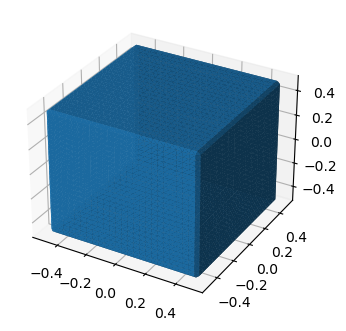

In [8]:
unitcube = np.zeros((l, m, n)) 

for i in range(l):
    for j in range(m):
        for k in range(n):
            unitcube[i,j,k] = np.max( np.array([ np.abs(x[i,j,k]) , np.abs(y[i,j,k]) , np.abs(z[i,j,k])  ]) ) -1/2

verts, faces, normals, values = measure.marching_cubes(unitcube, 0, spacing=(0.04, 0.04, 0.04))

verts[:,0]=(verts[:,0]-np.mean(verts[:,0])) # translate the coordinates of mesh vertices and move to center x
verts[:,1]=(verts[:,1]-np.mean(verts[:,1])) # translate the coordinates of mesh vertices and move to center y
verts[:,2]=(verts[:,2]-np.mean(verts[:,2])) # translate the coordinates of mesh vertices and move to center z

# PLOTTING
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2]) 
plt.show()


Check the length of the cube:

In [9]:
print(max(verts[:,0]) - min(verts[:,0]))
print(max(verts[:,1]) - min(verts[:,1]))
print(max(verts[:,2]) - min(verts[:,2]))

1.0
1.0
1.0


The cube is centered at (0,0) with length $L=1$. This means the domain of the cube in $x$, $y$, and $z$ should be (-0,5, 0.5). We see that this is true because the length computed in each dimension is $\max(x) - \min(x) = 1$, within the uncertainty due to the mesh discretization of $\pm 0.04$. 

__Cylinder Intersection with Cube (Min/Max)__

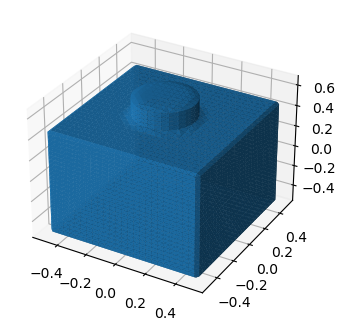

In [10]:
cylinder = x**2 + y**2 - 0.2**2
plane1 = z - 0.7
plane2 = z + 1/2  
sqrcil = np.zeros((l,m,n))
unitcube = np.zeros((l, m, n)) 
unioncube = np.zeros((l,m,n))


for i in range(l):
    for j in range(m):
        for k in range(n):
            sqrcil[i,j,k] = np.max( np.array( [cylinder[i,j,k], plane1[i,j,k] ]  ) ) # INTERSECTION
            sqrcil[i,j,k] = np.max( np.array( [sqrcil[i,j,k], -plane2[i,j,k] ]  ) ) # SUBTRATION 1
            unitcube[i,j,k] = np.max( np.array([ np.abs(x[i,j,k]) , np.abs(y[i,j,k]) , np.abs(z[i,j,k])  ]) ) -1/2
            unioncube[i,j,k] = np.min( np.array([unitcube[i,j,k], sqrcil[i,j,k] ]))

verts, faces, normals, values = measure.marching_cubes(unioncube, 0, spacing=(0.04, 0.04, 0.04))

verts[:,0]=(verts[:,0]-np.mean(verts[:,0])) # translate the coordinates of mesh vertices and move to center x
verts[:,1]=(verts[:,1]-np.mean(verts[:,1])) # translate the coordinates of mesh vertices and move to center y
verts[:,2]=(verts[:,2]-np.mean(verts[:,2])) # translate the coordinates of mesh vertices and move to center z

# PLOTTING
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2]) 
plt.show()

In [11]:
print(max(verts[:,2]) - min(verts[:,2]))

1.2000000000000002


The maximum height in the domain $z$ is 1.2 just as we would expect, such that the height of the cylinder component is 0.2 and the height of the cube component is 1. 

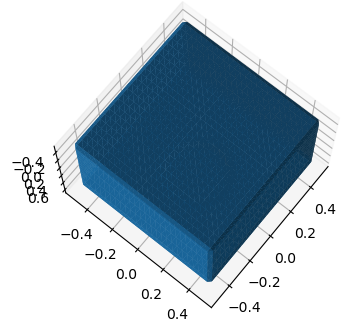

In [12]:
# PLOTTING
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2]) 
ax.view_init(-109, -39)
plt.show()

We see that the bottom of the surface is completely flat. 

__Metamorphasis__

$$ f(x,y,x,t) = f_1(x,y,z) \cdot (1-t) + f_2(x,y,z) \cdot t$$

$\Delta t = 0.1$

In [13]:
def compute_meta(f1, f2, t):
    
    return f1 * (1-t) + f2 * t

def plot_meta(meta, t):

    verts, faces, normals, values = measure.marching_cubes(meta, 0, spacing=(0.04, 0.04, 0.04))

    verts[:,0]=(verts[:,0]-np.mean(verts[:,0])) # translate the coordinates of mesh vertices and move to center x
    verts[:,1]=(verts[:,1]-np.mean(verts[:,1])) # translate the coordinates of mesh vertices and move to center y
    verts[:,2]=(verts[:,2]-np.mean(verts[:,2])) # translate the coordinates of mesh vertices and move to center z

    # PLOTTING
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2]) 
    ax.set_title(f"t = {t}")
    plt.show()


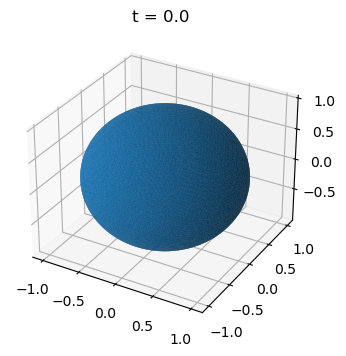

In [14]:
t = 0.0
meta = compute_meta(sphere, unioncube, t)
plot_meta(meta, t)

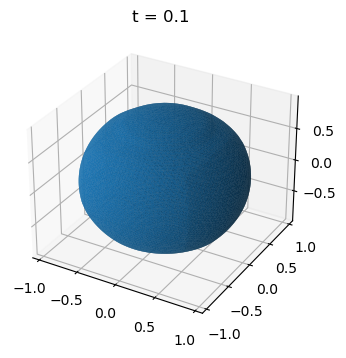

In [15]:
t = 0.1
meta = compute_meta(sphere, unioncube, t)
plot_meta(meta, t)

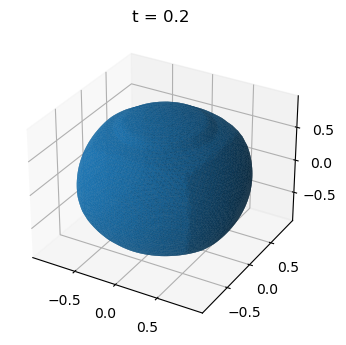

In [16]:
t = 0.2
meta = compute_meta(sphere, unioncube, t)
plot_meta(meta, t)

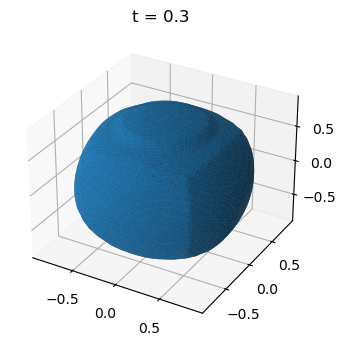

In [17]:
t = 0.3
meta = compute_meta(sphere, unioncube, t)
plot_meta(meta, t)

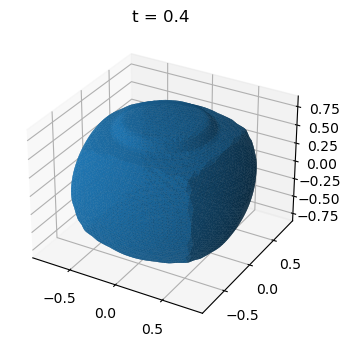

In [18]:
t = 0.4
meta = compute_meta(sphere, unioncube, t)
plot_meta(meta, t)

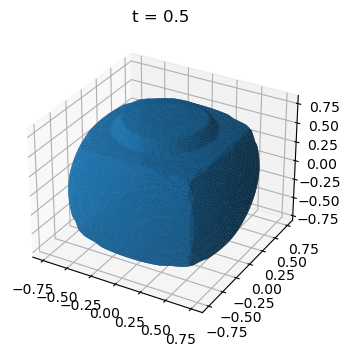

In [19]:
t = 0.5
meta = compute_meta(sphere, unioncube, t)
plot_meta(meta, t)

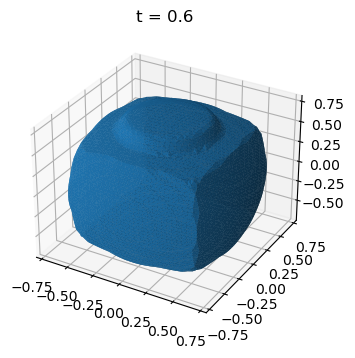

In [20]:
t = 0.6
meta = compute_meta(sphere, unioncube, t)
plot_meta(meta, t)

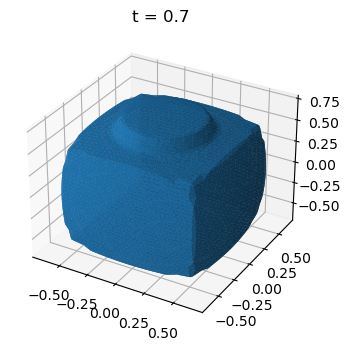

In [21]:
t = 0.7
meta = compute_meta(sphere, unioncube, t)
plot_meta(meta, t)

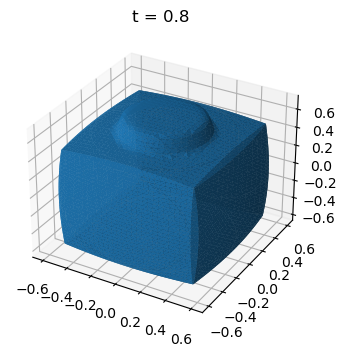

In [22]:
t = 0.8
meta = compute_meta(sphere, unioncube, t)
plot_meta(meta, t)

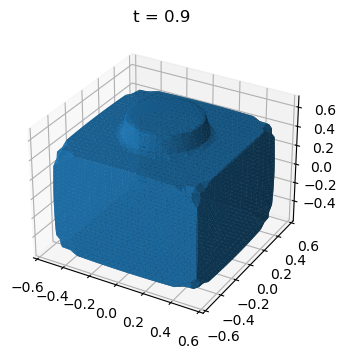

In [23]:
t = 0.9
meta = compute_meta(sphere, unioncube, t)
plot_meta(meta, t)

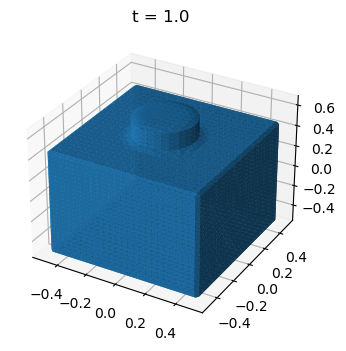

In [24]:
t = 1.0
meta = compute_meta(sphere, unioncube, t)
plot_meta(meta, t)